In [1]:
import os

from tqdm.auto import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm

In [2]:
plt.style.use('default')

In [3]:
D = 1
n = 10
N = 1e9
s = 0.125
c = 1
L = 1

save_dir = "grabby_aliens/outputs"

In [4]:
filename = f"D={D}_n={float(n)}_N={N:.2e}_s={s:.5e}_L={float(L)}_c={float(c)}.csv"
with open(os.path.join(save_dir, filename), "r") as f:
    df = pd.read_csv(f)

In [5]:
df

,X,OriginTime,MinWait,NumberSeen,MaxAngle
0,0.886569,0.110223,0.117063,0,0.000000
1,0.337149,0.153959,0.065311,0,0.000000
2,0.702443,0.163793,0.075380,0,0.000000
3,0.245547,0.167909,0.049808,0,0.000000
4,0.930345,0.176187,0.032879,1,0.063359
...,...,...,...,...,...
180,0.826717,0.270718,0.000324,18,0.821534
181,0.497813,0.274460,0.003824,23,0.704337
182,0.025478,0.277032,0.007491,18,0.464240
183,0.492094,0.281629,0.001197,26,0.751929


In [6]:
XT = list(zip(df['X'], df['OriginTime']))

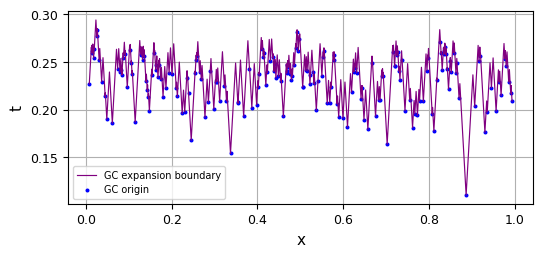

In [7]:
XT = sorted(XT, key=lambda xt: xt[0])
meeting_points = []
GCs_and_meeting_points = []
for i in range(len(XT) - 1):
    x0, t0 = XT[i]
    x1, t1 = XT[i+1]
    x = ((s*(t1 - t0)) + (x0 + x1)) / 2
    t = t0 + (x - x0)*(1/s)
    GCs_and_meeting_points.append((x0, t0))
    GCs_and_meeting_points.append((x, t))
    meeting_points.append((x, t))
GCs_and_meeting_points.append((XT[-1]))

# plt.suptitle(f'D={D} n={n} N={N:.2e} L={L} |C|={len(TS)} |C|/L^D={len(TS)/L**D}')
plt.figure(figsize=(6, 2.5))
ax = plt.subplot(1, 1, 1)

xs = [x for x,t in XT]
ts = [t for x,t in XT]
plt.scatter(xs, ts, s=3.5, color='blue', label="GC origin")

plt.plot(*zip(*GCs_and_meeting_points), linewidth=0.85, color='purple', label="GC expansion boundary")
plt.xlabel("x", fontsize=11)
plt.xticks(fontsize=9)
plt.ylabel("t", fontsize=11)
plt.yticks(fontsize=9)
# plt.ylim(None, 0.47)

plt.grid(True)
ax.set_axisbelow(True)

plt.legend(prop={'size': 7})